<a href="https://colab.research.google.com/github/Nazmin-Babubaker/Dementia-Prediction-using-kaggle-dataset/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dementia_patients_health_data.csv to dementia_patients_health_data.csv


In [ ]:
import pandas as pd
import io


file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))


df = df.drop(['Prescription', 'Dosage in mg','Cognitive_Test_Scores'], axis=1)

display(df.head())

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Education_Level,Dominant_Hand,...,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,60,Primary School,Left,...,No,Current Smoker,Negative,Sedentary,No,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,61,Secondary School,Right,...,No,Former Smoker,Positive,Moderate Activity,No,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,69,Primary School,Right,...,Yes,Former Smoker,Negative,Moderate Activity,No,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,78,Secondary School,Left,...,Yes,Never Smoked,Negative,Mild Activity,Yes,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,77,Secondary School,Right,...,Yes,Never Smoked,Positive,Mild Activity,No,Yes,Low-Carb Diet,Good,Diabetes,1


In [ ]:
df['Chronic_Health_Conditions'] = df['Chronic_Health_Conditions'].fillna('None')
display(df.isnull().sum())

,0
Diabetic,0
AlcoholLevel,0
HeartRate,0
BloodOxygenLevel,0
BodyTemperature,0
Weight,0
MRI_Delay,0
Age,0
Education_Level,0
Dominant_Hand,0


In [ ]:
# Select categorical columns for one-hot encoding
categorical_cols = ['Education_Level', 'Dominant_Hand', 'Gender', 'Family_History',
                    'Smoking_Status', 'APOE_ε4', 'Physical_Activity',
                    'Depression_Status', 'Medication_History', 'Nutrition_Diet',
                    'Sleep_Quality', 'Chronic_Health_Conditions']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# Display the first few rows of the encoded dataframe and the new columns
display(df_encoded.head())
print("\nNew columns created by one-hot encoding:")
print([col for col in df_encoded.columns if any(cat in col for cat in categorical_cols)])

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Dementia,Education_Level_Diploma/Degree,...,Medication_History_Yes,Nutrition_Diet_Balanced Diet,Nutrition_Diet_Low-Carb Diet,Nutrition_Diet_Mediterranean Diet,Sleep_Quality_Good,Sleep_Quality_Poor,Chronic_Health_Conditions_Diabetes,Chronic_Health_Conditions_Heart Disease,Chronic_Health_Conditions_Hypertension,Chronic_Health_Conditions_None
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,60,0,False,...,False,False,True,False,False,True,True,False,False,False
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,61,1,False,...,True,False,True,False,False,True,False,True,False,False
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,69,0,False,...,False,False,False,True,False,True,False,True,False,False
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,78,1,False,...,True,True,False,False,False,True,False,False,True,False
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,77,1,False,...,True,False,True,False,True,False,True,False,False,False



New columns created by one-hot encoding:
['Education_Level_Diploma/Degree', 'Education_Level_No School', 'Education_Level_Primary School', 'Education_Level_Secondary School', 'Dominant_Hand_Left', 'Dominant_Hand_Right', 'Gender_Female', 'Gender_Male', 'Family_History_No', 'Family_History_Yes', 'Smoking_Status_Current Smoker', 'Smoking_Status_Former Smoker', 'Smoking_Status_Never Smoked', 'APOE_ε4_Negative', 'APOE_ε4_Positive', 'Physical_Activity_Mild Activity', 'Physical_Activity_Moderate Activity', 'Physical_Activity_Sedentary', 'Depression_Status_No', 'Depression_Status_Yes', 'Medication_History_No', 'Medication_History_Yes', 'Nutrition_Diet_Balanced Diet', 'Nutrition_Diet_Low-Carb Diet', 'Nutrition_Diet_Mediterranean Diet', 'Sleep_Quality_Good', 'Sleep_Quality_Poor', 'Chronic_Health_Conditions_Diabetes', 'Chronic_Health_Conditions_Heart Disease', 'Chronic_Health_Conditions_Hypertension', 'Chronic_Health_Conditions_None']


In [ ]:
# Separate data by gender
male_df = df_encoded[df_encoded['Gender_Male'] == 1].copy()
female_df = df_encoded[df_encoded['Gender_Female'] == 1].copy()

# Define columns to drop
cols_to_drop = ['Dominant_Hand_Left', 'Gender_Male', 'Gender_Female',
                'Family_History_No', 'APOE_ε4_Negative', 'Depression_Status_No',
                'Medication_History_No', 'Sleep_Quality_Good']

# Drop the specified columns from both dataframes
male_df = male_df.drop(cols_to_drop, axis=1)
female_df = female_df.drop(cols_to_drop, axis=1)

# Convert boolean columns to binary (0s and 1s)
for col in male_df.columns:
    if male_df[col].dtype == 'bool':
        male_df[col] = male_df[col].astype(int)

for col in female_df.columns:
    if female_df[col].dtype == 'bool':
        female_df[col] = female_df[col].astype(int)


# Display the first few rows of each dataframe
print("Male Dataframe Head:")
display(male_df.head())
display(male_df.dtypes)

print("\nFemale Dataframe Head:")
display(female_df.head())
display(female_df.dtypes)

Male Dataframe Head:


,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Dementia,Education_Level_Diploma/Degree,...,Depression_Status_Yes,Medication_History_Yes,Nutrition_Diet_Balanced Diet,Nutrition_Diet_Low-Carb Diet,Nutrition_Diet_Mediterranean Diet,Sleep_Quality_Poor,Chronic_Health_Conditions_Diabetes,Chronic_Health_Conditions_Heart Disease,Chronic_Health_Conditions_Hypertension,Chronic_Health_Conditions_None
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,61,1,0,...,0,1,0,1,0,1,0,1,0,0
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,69,0,0,...,0,0,0,0,1,1,0,1,0,0
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,77,1,0,...,0,1,0,1,0,0,1,0,0,0
5,1,0.114028,94,94.546754,36.678071,66.592329,21.154863,67,1,0,...,1,0,0,1,0,1,1,0,0,0
6,1,0.016194,90,96.423361,37.024630,83.976553,11.350612,87,1,0,...,0,0,0,0,1,1,1,0,0,0


,0
Diabetic,int64
AlcoholLevel,float64
HeartRate,int64
BloodOxygenLevel,float64
BodyTemperature,float64
Weight,float64
MRI_Delay,float64
Age,int64
Dementia,int64
Education_Level_Diploma/Degree,int64



Female Dataframe Head:


,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Dementia,Education_Level_Diploma/Degree,...,Depression_Status_Yes,Medication_History_Yes,Nutrition_Diet_Balanced Diet,Nutrition_Diet_Low-Carb Diet,Nutrition_Diet_Mediterranean Diet,Sleep_Quality_Poor,Chronic_Health_Conditions_Diabetes,Chronic_Health_Conditions_Heart Disease,Chronic_Health_Conditions_Hypertension,Chronic_Health_Conditions_None
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,60,0,0,...,0,0,0,1,0,1,1,0,0,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,78,1,0,...,1,1,1,0,0,1,0,0,1,0
7,0,0.161158,98,92.007370,36.050294,69.653564,30.339413,66,0,0,...,0,1,0,1,0,1,0,0,1,0
8,0,0.015754,69,99.859490,36.955259,53.725078,36.629687,66,0,0,...,0,1,0,0,1,1,0,0,0,1
9,1,0.097340,64,90.319068,36.396286,58.366698,49.175758,87,1,1,...,1,1,1,0,0,0,1,0,0,0


,0
Diabetic,int64
AlcoholLevel,float64
HeartRate,int64
BloodOxygenLevel,float64
BodyTemperature,float64
Weight,float64
MRI_Delay,float64
Age,int64
Dementia,int64
Education_Level_Diploma/Degree,int64


In [ ]:
# Define features (X) and target (y) for male and female dataframes

# Target variable is 'Dementia'
target = 'Dementia'


features = [col for col in male_df.columns if col != target]


X_male = male_df[features]
y_male = male_df[target]

X_female = female_df[features]
y_female = female_df[target]

print("Male features (X_male) shape:", X_male.shape)
print("Male target (y_male) shape:", y_male.shape)
print("\nFemale features (X_female) shape:", X_female.shape)
print("Female target (y_female) shape:", y_female.shape)

Male features (X_male) shape: (496, 31)
Male target (y_male) shape: (496,)

Female features (X_female) shape: (504, 31)
Female target (y_female) shape: (504,)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Stratified K-Fold

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# --- Cross-validation for Male Data ---
print("Performing Stratified K-Fold Cross-Validation for Male Data...")

male_accuracy_scores = []
male_precision_scores = []
male_recall_scores = []
male_f1_scores = []


X_test_male_last_fold = None
y_test_male_last_fold = None

for fold, (train_index, test_index) in enumerate(skf.split(X_male, y_male)):
    print(f"Fold {fold+1}/{n_splits}")

    X_train_male, X_test_male = X_male.iloc[train_index], X_male.iloc[test_index]
    y_train_male, y_test_male = y_male.iloc[train_index], y_male.iloc[test_index]

    # Initialize and train Random Forest model

    rf_male_fold = RandomForestClassifier(
        n_estimators=100,
        max_depth=4,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    )
    rf_male_fold.fit(X_train_male, y_train_male)

    # Predict on the test set
    y_pred_male = rf_male_fold.predict(X_test_male)

    # Calculate evaluation metrics
    male_accuracy_scores.append(accuracy_score(y_test_male, y_pred_male))
    male_precision_scores.append(precision_score(y_test_male, y_pred_male))
    male_recall_scores.append(recall_score(y_test_male, y_pred_male))
    male_f1_scores.append(f1_score(y_test_male, y_pred_male))

    # Store test set from the last fold
    if fold == n_splits - 1:
        X_test_male_last_fold = X_test_male
        y_test_male_last_fold = y_test_male


print("\n--- Cross-validation for Female Data ---")

female_accuracy_scores = []
female_precision_scores = []
female_recall_scores = []
female_f1_scores = []

# Variables to store the test set from the last fold
X_test_female_last_fold = None
y_test_female_last_fold = None

for fold, (train_index, test_index) in enumerate(skf.split(X_female, y_female)):
    print(f"Fold {fold+1}/{n_splits}")

    X_train_female, X_test_female = X_female.iloc[train_index], X_female.iloc[test_index]
    y_train_female, y_test_female = y_female.iloc[train_index], y_female.iloc[test_index]

    # Initialize and train Random Forest model

    rf_female_fold = RandomForestClassifier(
        n_estimators=200,
        max_depth=4,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    )
    rf_female_fold.fit(X_train_female, y_train_female)

    # Predict on the test set
    y_pred_female = rf_female_fold.predict(X_test_female)

    # Calculate evaluation metrics
    female_accuracy_scores.append(accuracy_score(y_test_female, y_pred_female))
    female_precision_scores.append(precision_score(y_test_female, y_pred_female))
    female_recall_scores.append(recall_score(y_test_female, y_pred_female))
    female_f1_scores.append(f1_score(y_test_female, y_pred_female))

    # Store test set from the last fold
    if fold == n_splits - 1:
        X_test_female_last_fold = X_test_female
        y_test_female_last_fold = y_test_female


# Print average scores
print("\nAverage Evaluation Metrics (Male):")
print(f"  Accuracy: {sum(male_accuracy_scores)/n_splits:.4f}")
print(f"  Precision: {sum(male_precision_scores)/n_splits:.4f}")
print(f"  Recall: {sum(male_recall_scores)/n_splits:.4f}")
print(f"  F1-Score: {sum(male_f1_scores)/n_splits:.4f}")

print("\nAverage Evaluation Metrics (Female):")
print(f"  Accuracy: {sum(female_accuracy_scores)/n_splits:.4f}")
print(f"  Precision: {sum(female_precision_scores)/n_splits:.4f}")
print(f"  Recall: {sum(female_recall_scores)/n_splits:.4f}")
print(f"  F1-Score: {sum(female_f1_scores)/n_splits:.4f}")

Performing Stratified K-Fold Cross-Validation for Male Data...
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5

--- Cross-validation for Female Data ---
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5

Average Evaluation Metrics (Male):
  Accuracy: 0.7783
  Precision: 0.8647
  Recall: 0.6518
  F1-Score: 0.7381

Average Evaluation Metrics (Female):
  Accuracy: 0.7916
  Precision: 0.8942
  Recall: 0.6550
  F1-Score: 0.7482


In [ ]:
import pandas as pd

# Get feature importances from the last fold's trained models

male_feature_importances = rf_male_fold.feature_importances_
female_feature_importances = rf_female_fold.feature_importances_

# Create dataframes for better visualization and comparison
male_feature_importance_df = pd.DataFrame({'Feature': X_male.columns, 'Importance': male_feature_importances})
female_feature_importance_df = pd.DataFrame({'Feature': X_female.columns, 'Importance': female_feature_importances})

# Sort features by importance
male_feature_importance_df = male_feature_importance_df.sort_values(by='Importance', ascending=False)
female_feature_importance_df = female_feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N features for each gender
top_n = 23
print(f"Top {top_n} Feature Importances (Male):")
display(male_feature_importance_df.head(top_n))

print(f"\nTop {top_n} Feature Importances (Female):")
display(female_feature_importance_df.head(top_n))

Top 23 Feature Importances (Male):


,Feature,Importance
21,Depression_Status_Yes,0.307849
17,APOE_ε4_Positive,0.143226
14,Smoking_Status_Current Smoker,0.117587
5,Weight,0.064653
3,BloodOxygenLevel,0.063401
4,BodyTemperature,0.061046
7,Age,0.051030
6,MRI_Delay,0.033042
2,HeartRate,0.030670
1,AlcoholLevel,0.028579



Top 23 Feature Importances (Female):


,Feature,Importance
21,Depression_Status_Yes,0.422415
17,APOE_ε4_Positive,0.130956
14,Smoking_Status_Current Smoker,0.090840
5,Weight,0.041427
3,BloodOxygenLevel,0.037462
1,AlcoholLevel,0.035712
4,BodyTemperature,0.033747
6,MRI_Delay,0.031102
7,Age,0.026730
9,Education_Level_No School,0.026041


SHAP values calculated for both male and female test sets.
Shape of shap_explanation_male.values: (99, 31, 2)
Shape of X_test_male_last_fold: (99, 31)
Shape of shap_explanation_female.values: (100, 31, 2)
Shape of X_test_female_last_fold: (100, 31)
SHAP Beeswarm Plot for Male Model:


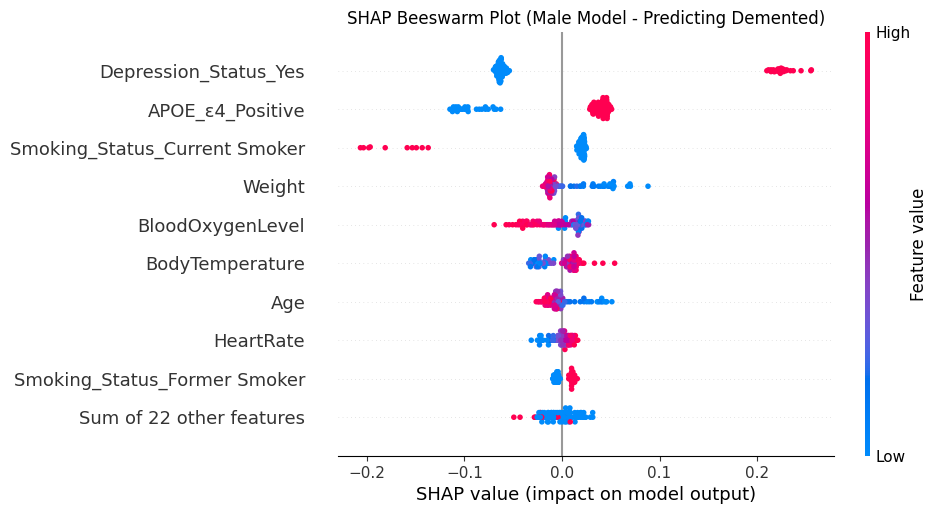


SHAP Beeswarm Plot for Female Model:


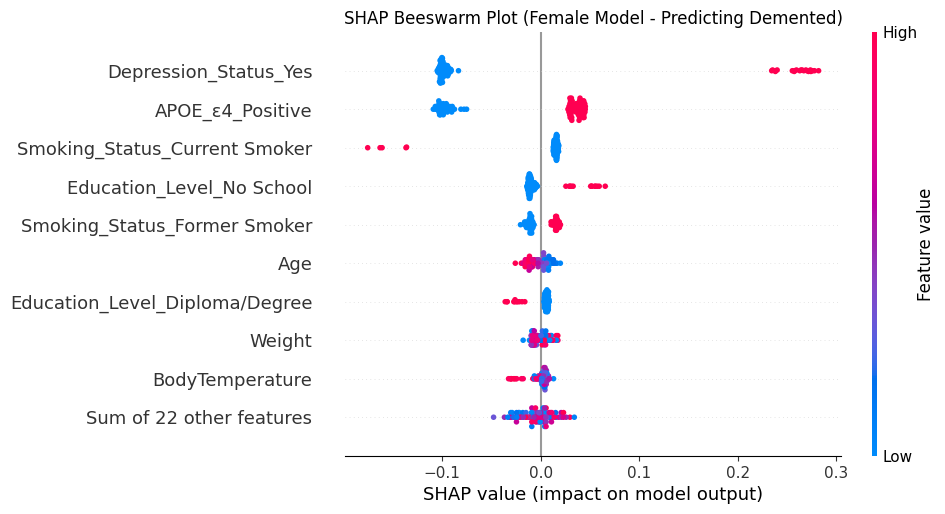

In [ ]:
!pip install shap

import shap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Initialize TreeExplainer for male and female models
# Using the models trained on the last fold
explainer_male = shap.TreeExplainer(rf_male_fold)
explainer_female = shap.TreeExplainer(rf_female_fold)

# Calculate SHAP values for the test sets from the last fold
shap_values_male = explainer_male.shap_values(X_test_male_last_fold)
shap_values_female = explainer_female.shap_values(X_test_female_last_fold)

print("SHAP values calculated for both male and female test sets.")

# Create LabelEncoders for each gender's target variable from the last fold's test sets
le_male = LabelEncoder()
le_male.fit(y_test_male_last_fold)

le_female = LabelEncoder()
le_female.fit(y_test_female_last_fold)


# Explain the male model's predictions
shap_explanation_male = explainer_male(X_test_male_last_fold)

# Explain the female model's predictions
shap_explanation_female = explainer_female(X_test_female_last_fold)


print("Shape of shap_explanation_male.values:", shap_explanation_male.values.shape)
print("Shape of X_test_male_last_fold:", X_test_male_last_fold.shape)
print("Shape of shap_explanation_female.values:", shap_explanation_female.values.shape)
print("Shape of X_test_female_last_fold:", X_test_female_last_fold.shape)


# Visualize the feature importance for the male model using beeswarm plot
print("SHAP Beeswarm Plot for Male Model:")

plt.figure(figsize=(10, 15))
demented_class_index_male = list(le_male.classes_).index(1)
shap.plots.beeswarm(shap_explanation_male[:, :, demented_class_index_male], show=False)
plt.title("SHAP Beeswarm Plot (Male Model - Predicting Demented)")
plt.show()

# Visualize the feature importance for the female model using beeswarm plot
print("\nSHAP Beeswarm Plot for Female Model:")
plt.figure(figsize=(10, 15))
demented_class_index_female = list(le_female.classes_).index(1)
shap.plots.beeswarm(shap_explanation_female[:, :, demented_class_index_female], show=False)
plt.title("SHAP Beeswarm Plot (Female Model - Predicting Demented)")
plt.show()

Mean Absolute SHAP values for Male Model:


,0
Depression_Status_Yes,0.112129
APOE_ε4_Positive,0.056823
Smoking_Status_Current Smoker,0.035940
Weight,0.020266
BloodOxygenLevel,0.019733
BodyTemperature,0.015825
Age,0.012760
HeartRate,0.008503
Smoking_Status_Former Smoker,0.007888
Education_Level_Diploma/Degree,0.005724



Mean Absolute SHAP values for Female Model:


,0
Depression_Status_Yes,0.132540
APOE_ε4_Positive,0.060492
Smoking_Status_Current Smoker,0.022335
Education_Level_No School,0.014738
Smoking_Status_Former Smoker,0.013392
Age,0.008969
Education_Level_Diploma/Degree,0.008328
Weight,0.006764
BodyTemperature,0.006648
MRI_Delay,0.005813


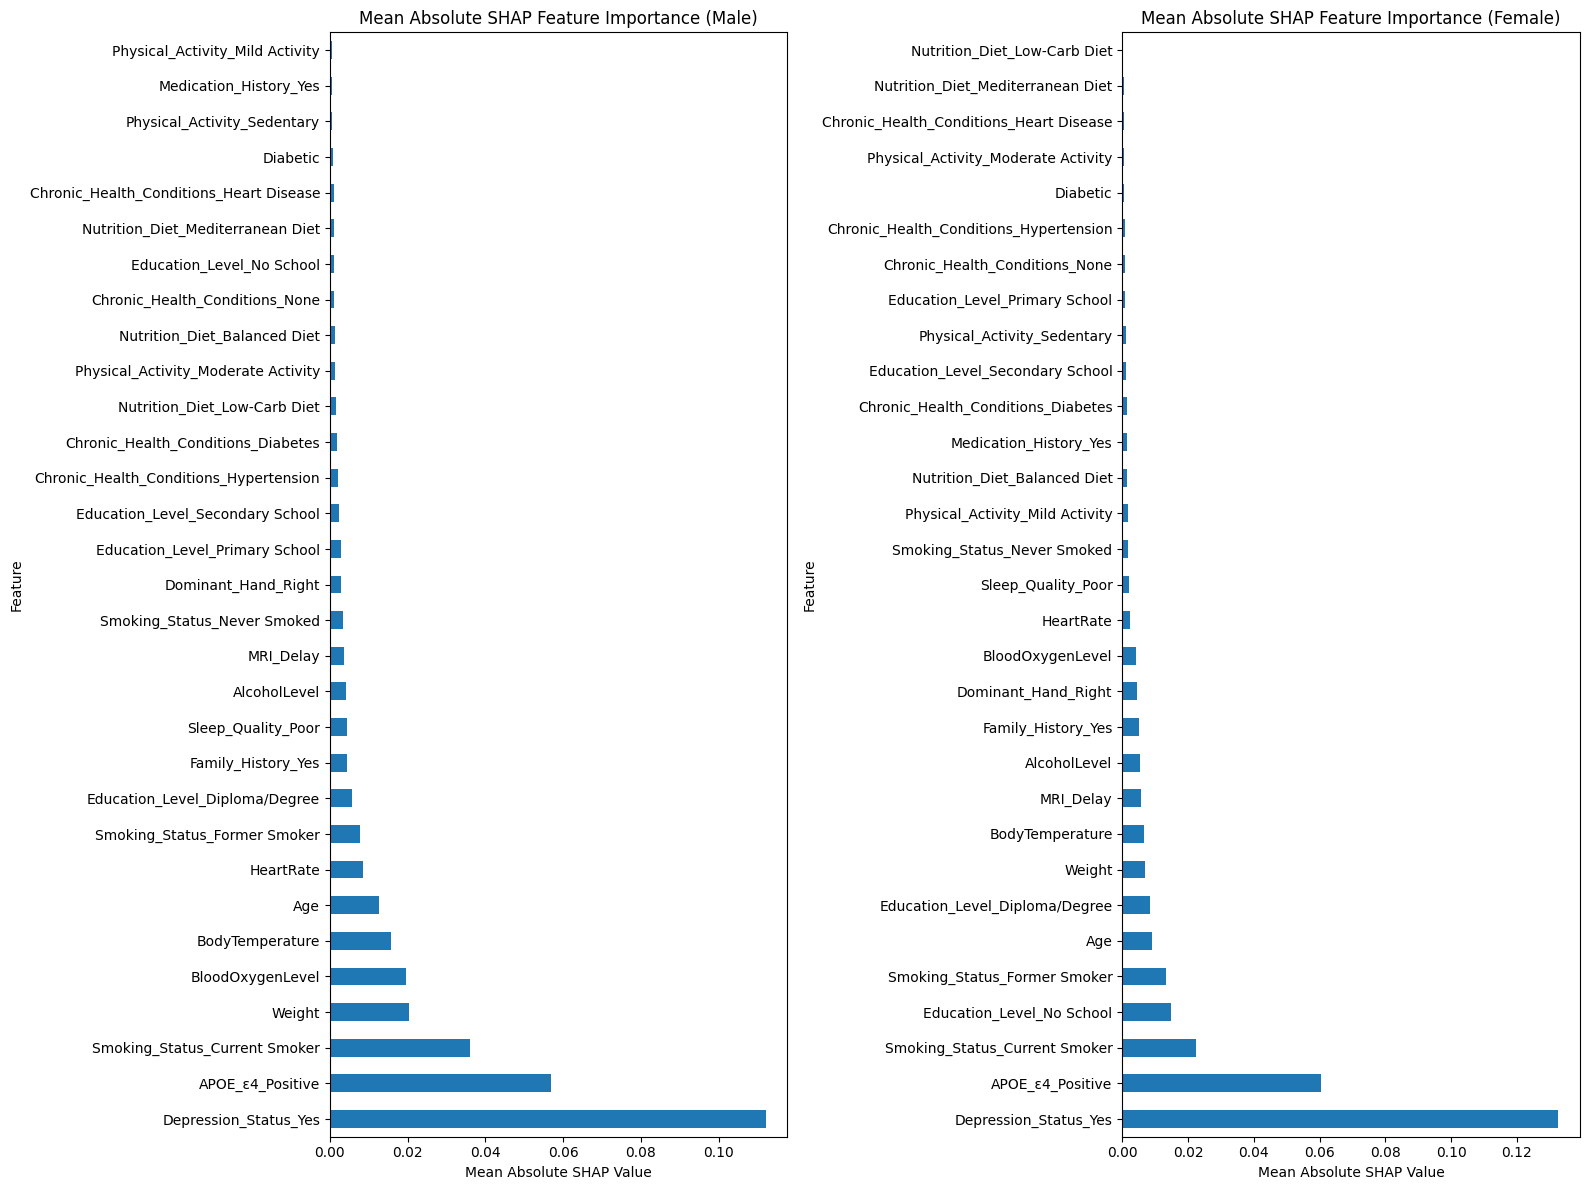

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Calculate mean absolute SHAP values for male model
male_mean_abs_shap = abs(shap_explanation_male.values).mean(axis=0)
male_feature_importance = pd.Series(male_mean_abs_shap[:, 1], index=X_test_male_last_fold.columns).sort_values(ascending=False)

# Calculate mean absolute SHAP values for female model
female_mean_abs_shap = abs(shap_explanation_female.values).mean(axis=0)
female_feature_importance = pd.Series(female_mean_abs_shap[:, 1], index=X_test_female_last_fold.columns).sort_values(ascending=False)

print("Mean Absolute SHAP values for Male Model:")
display(male_feature_importance)

print("\nMean Absolute SHAP values for Female Model:")
display(female_feature_importance)

# Create bar plots for comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 12))

# Bar plot for Male
male_feature_importance.plot(kind='barh', ax=axes[0])
axes[0].set_title('Mean Absolute SHAP Feature Importance (Male)')
axes[0].set_xlabel('Mean Absolute SHAP Value')
axes[0].set_ylabel('Feature')

# Bar plot for Female
female_feature_importance.plot(kind='barh', ax=axes[1])
axes[1].set_title('Mean Absolute SHAP Feature Importance (Female)')
axes[1].set_xlabel('Mean Absolute SHAP Value')
axes[1].set_ylabel('Feature')

plt.tight_layout()
plt.show()